# Results

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np


from pollinator_model import PollinatorModel
from mesa.batchrunner import batch_run

## Comparing different bee types

  0%|          | 0/3 [00:00<?, ?it/s]

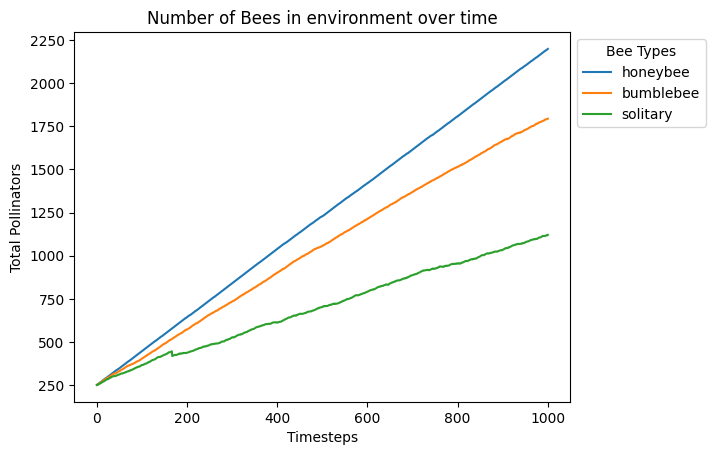

In [43]:
params = {'bee_type' : ['honeybee', 'bumblebee', 'solitary'], 'num_pollinators' : 250, 'pesticide_ratio' : 0}

results = batch_run(
    PollinatorModel,
    parameters=params,
    iterations=1,
    max_steps=1000,
    number_processes=1,
    data_collection_period=1,
    display_progress=True,
)

results_df = pd.DataFrame(results)
#print(results_df[['bee_type', 'Total Pollinators']])

graph1 = sns.lineplot(data=results_df, x="Step", y='Total Pollinators', hue="bee_type")
graph1.set(title='Number of Bees in environment over time', xlabel='Timesteps')
sns.move_legend(graph1, "upper left", bbox_to_anchor=(1, 1), title="Bee Types")

## Comparing pesticide and pesticide-free

### Honeybees

In [23]:
model_pesticides = PollinatorModel(bee_type='honeybee', sensitivity='moderate', num_pollinators=500, pesticide_ratio=0.9)
for _ in range(1000):
    model_pesticides.step()
data_pesticides = model_pesticides.datacollector.get_model_vars_dataframe()
data_pesticides_population = np.array(data_pesticides['Total Pollinators'])

model_free = PollinatorModel(bee_type='honeybee', sensitivity='moderate', num_pollinators=500, pesticide_ratio=0.1)
for _ in range(1000):
    model_free.step()
data_free = model_free.datacollector.get_model_vars_dataframe()
data_free_population = np.array(data_free['Total Pollinators'])

Percentage decrease for high contaminated:  68.8
Percentage increase for low contaminated:  92.4


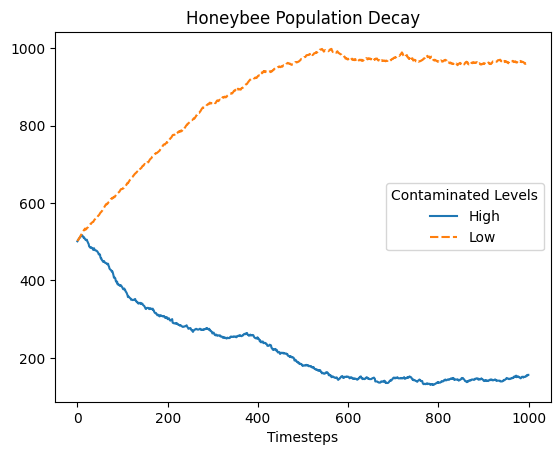

In [24]:
data = pd.DataFrame({
    'timesteps' : [i for i in range(1000)],
    'High' : data_pesticides_population,
    'Low' : data_free_population
})

g = sns.lineplot(data=data[['High', 'Low']])
g.set(title='Honeybee Population Decay', xlabel='Timesteps')
g.legend(title="Contaminated Levels")

percentage_decrease = abs(500 - data_pesticides_population[-1]) / 500 * 100
percentage_increase = abs(data_free_population[-1] - 500) / 500 * 100
print('Percentage decrease for high contaminated: ', percentage_decrease)
print('Percentage increase for low contaminated: ', percentage_increase)

### Bumblebee

In [18]:
model_pesticides = PollinatorModel(bee_type='bumblebee', sensitivity='moderate', num_pollinators=100, pesticide_ratio=0.9)
for _ in range(1000):
    model_pesticides.step()
data_pesticides = model_pesticides.datacollector.get_model_vars_dataframe()
data_pesticides_population = np.array(data_pesticides['Total Pollinators'])

model_free = PollinatorModel(bee_type='bumblebee', sensitivity='moderate', num_pollinators=100, pesticide_ratio=0.1)
for _ in range(1000):
    model_free.step()
data_free = model_free.datacollector.get_model_vars_dataframe()
data_free_population = np.array(data_free['Total Pollinators'])

Percentage decrease for high contaminated:  1.05
Percentage increase for low contaminated:  9.33


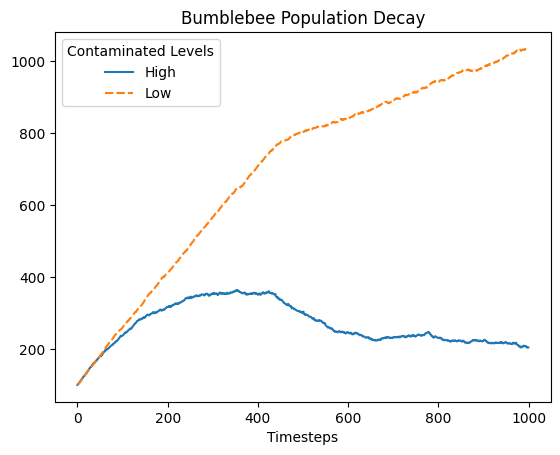

In [ ]:
data = pd.DataFrame({
    'timesteps' : [i for i in range(1000)],
    'High' : data_pesticides_population,
    'Low' : data_free_population
})

g = sns.lineplot(data=data[['High', 'Low']])
g.set(title='Bumblebee Population Decay', xlabel='Timesteps')
g.legend(title="Contaminated Levels")

percentage_decrease = abs(100 - data_pesticides_population[-1]) / 100
percentage_increase = abs(data_free_population[-1] - 100)/100
print('Percentage decrease for high contaminated: ', percentage_decrease)
print('Percentage increase for low contaminated: ', percentage_increase)

### Solitarybee

In [25]:
model_pesticides = PollinatorModel(bee_type='solitary', sensitivity='moderate', num_pollinators=250, pesticide_ratio=0.9)
for _ in range(1000):
    model_pesticides.step()
data_pesticides = model_pesticides.datacollector.get_model_vars_dataframe()
data_pesticides_population = np.array(data_pesticides['Total Pollinators'])

model_free = PollinatorModel(bee_type='solitary', sensitivity='moderate', num_pollinators=250, pesticide_ratio=0.1)
for _ in range(1000):
    model_free.step()
data_free = model_free.datacollector.get_model_vars_dataframe()
data_free_population = np.array(data_free['Total Pollinators'])

Percentage decrease for high contaminated:  90.0
Percentage increase for low contaminated:  36.0


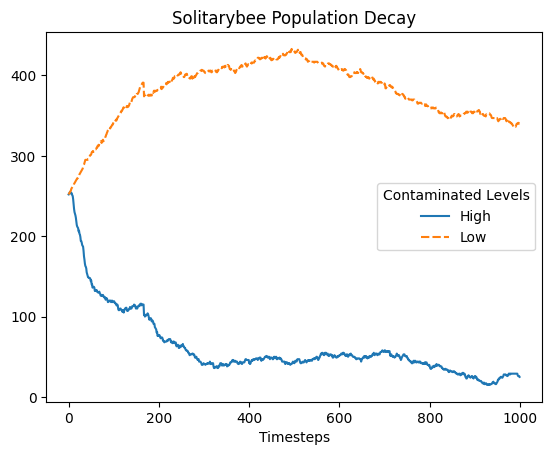

In [27]:
data = pd.DataFrame({
    'timesteps' : [i for i in range(1000)],
    'High' : data_pesticides_population,
    'Low' : data_free_population
})

g = sns.lineplot(data=data[['High', 'Low']])
g.set(title='Solitarybee Population Decay', xlabel='Timesteps')
g.legend(title="Contaminated Levels")
percentage_decrease = abs(250 - data_pesticides_population[-1]) / 250 * 100
percentage_increase = abs(data_free_population[-1] - 250) / 250 * 100
print('Percentage decrease for high contaminated: ', percentage_decrease)
print('Percentage increase for low contaminated: ', percentage_increase)

### Limitations

In [40]:
params = {'bee_type' : 'honeybee', 'num_pollinators' : 500, 'width': [150, 200, 300], 'height' : [150, 200, 300]}

results = batch_run(
    PollinatorModel,
    parameters=params,
    iterations=1,
    max_steps=500,
    number_processes=1,
    data_collection_period=1,
    display_progress=True,
)

results_df = pd.DataFrame(results)

  0%|          | 0/9 [00:00<?, ?it/s]

      width  height  Total Pollinators
0       150     150                502
1       150     150                504
2       150     150                506
3       150     150                508
4       150     150                510
...     ...     ...                ...
4504    300     300                491
4505    300     300                489
4506    300     300                488
4507    300     300                487
4508    300     300                489

[1503 rows x 3 columns]


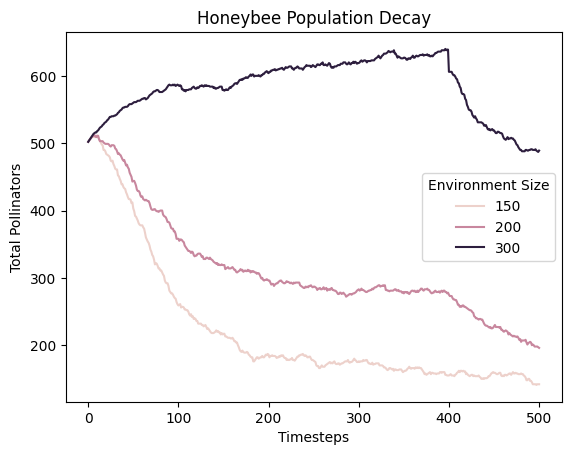

In [42]:
df_filtered = results_df[results_df['width'] == results_df['height']]
print(df_filtered[['width','height', 'Total Pollinators']])
g = sns.lineplot(data=df_filtered, x="Step", y='Total Pollinators', hue='width')
g.set(title='Honeybee Population Decay', xlabel='Timesteps')
g.legend(title="Environment Size")